#Youtube Trending - Exploring Relationships

Content:
- 01 Import libraries and data
- 02 Picking variables for exploratory visual analysis
- 03 Correlation matrix heatmap
- 04 Scatterplot
- 05 Pair plot of the entire dataset
- 06 Categorical plot and interpretation
- 07 Further insights
- 08 Hypothesis
- 09 Final adjustments and data export

#01 Import Libraries and Datasets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#define path
path=r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Achievement_6'

In [3]:
#import dataset
df=pd.read_pickle(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_reduced_clean.pkl'))

In [4]:
#import dataset
df_tags=pd.read_csv(os.path.join(path,'02_Data','02_Prepared_Data','yt_video_tags.csv'),index_col=False)

#02 Select variables suitable for exploratory visual analysis

In [5]:
df.head()

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,video_id,channel_id,video_tags,publish_date,language
0,"Freeman HKD, Nox, Tyfah Guni - Man To Man (Off...",FreemanHKDVEVO,1,0,0,2023-11-29,ZW,659445,12525,1154,nOjbJdw2dPs,UCBqFAZ41zHq5h5-7A1YpiuQ,"Freeman, HKD, Nox, Tyfah, Guni, Man, (Official...",2023-11-02 00:00:00+00:00,nan
1,Nutty O - Jericho ft. BLING4 & Bagga,NuttyOVEVO,2,0,48,2023-11-29,ZW,96852,6361,795,7g71VmQzyD4,UCwY1uVRu0ML4wWBm9pGZy_g,"Jericho, BLING4, Bagga, Ragga-Soca, reggae, po...",2023-11-23 00:00:00+00:00,nan
2,"Kamo Mphela, Khalil Harrison & Tyler ICU - Dal...",Kamo Mphelaxx,3,0,47,2023-11-29,ZW,1236824,41518,1290,hcqcy6cdCw8,UCfYbXQVQZYoISJzqBdH15Eg,"kamo mphela, tyler icu, dalie, Mnike, Amapiano...",2023-11-22 00:00:00+00:00,nan
3,Garnacho UNBELIEVABLE Overhead Kick! 🤩 | Evert...,Manchester United,4,1,46,2023-11-29,ZW,6607439,153575,5580,qgmhQZzoy1s,UC6yW44UGJJBvYTlfC7CRg2Q,"manchester united, mufc, man utd, manutd, mu, ...",2023-11-26 00:00:00+00:00,en-GB
4,Drake - First Person Shooter ft. J. Cole,DrakeVEVO,5,-1,-3,2023-11-29,ZW,19193308,858667,36413,Xty2gi5cMa8,UCQznUf1SjfDqx65hX3zRDiA,"Drake, First, Person, Shooter, OVO/Republic, H...",2023-11-15 00:00:00+00:00,en


In [6]:
#check all columns in df
df.columns

Index(['title', 'channel_name', 'daily_rank', 'daily_movement',
       'weekly_movement', 'snapshot_date', 'country', 'view_count',
       'like_count', 'comment_count', 'video_id', 'channel_id', 'video_tags',
       'publish_date', 'language'],
      dtype='object')

In [7]:
#creating subset appropriate for visual analysis
df_eva=df.drop(columns=['title', 'channel_name','video_id','channel_id'])

#03 Create a correlation matrix heatmap and discuss what the coefficients in the plot mean

In [9]:
df_eva.dtypes

daily_rank          int64
daily_movement      int64
weekly_movement     int64
snapshot_date      object
country            object
view_count          int64
like_count          int64
comment_count       int64
video_tags         object
publish_date       object
language           object
dtype: object

In [12]:
df_cor=df_eva.drop(columns=['country','video_tags','publish_date','language','snapshot_date'])

In [13]:
#create a correlation matrix using pandas
df_cor.corr()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count
daily_rank,1.000000,-0.563344,-0.772525,0.014296,-0.013169,-0.028833
daily_movement,-0.563344,1.000000,0.499404,-0.052591,-0.052679,-0.020607
weekly_movement,-0.772525,0.499404,1.000000,-0.166609,-0.119706,-0.006172
view_count,0.014296,-0.052591,-0.166609,1.000000,0.828267,0.288552
like_count,-0.013169,-0.052679,-0.119706,0.828267,1.000000,0.491811
comment_count,-0.028833,-0.020607,-0.006172,0.288552,0.491811,1.000000


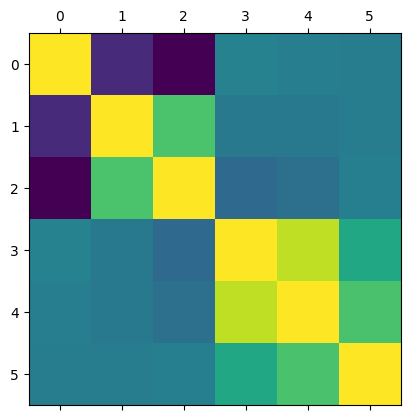

In [14]:
#create a correlation heatmap using matplotlib

plt.matshow(df_cor.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

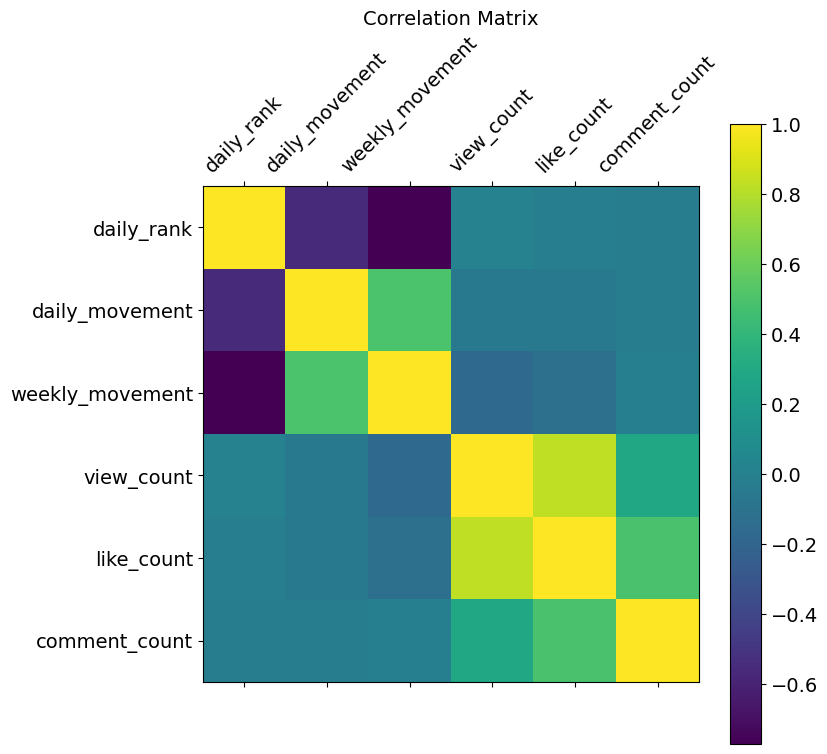

In [15]:
#fine tune parameters
f= plt.figure(figsize=(8,8))
plt.matshow(df_cor.corr(),fignum=f.number)
plt.xticks(range(df_cor.shape[1]),df_cor.columns, fontsize=14, rotation=45)
plt.yticks(range(df_cor.shape[1]),df_cor.columns, fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

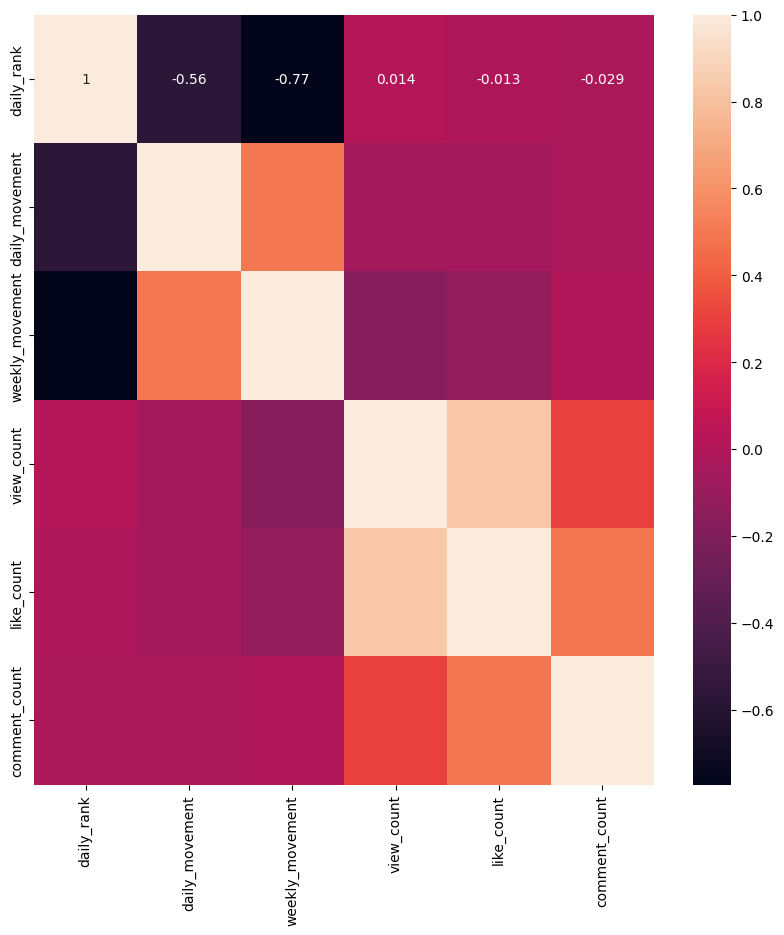

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(df_cor.corr(), annot = True, ax = ax)

Some of the things that we can observe are that the coefficients suggest a strong negative relationship between the variables 'daily_rank' and 'weekly_movement'. Considering the ranking numbers would function in such a way that the lower the number, the higher the video is placed on the chart, this would mean the higher the ranking of a video on that day, the larger the change in rank based on the previous week. While there is also a strong relationship between 'daily_rank' and 'daily_movement', this is not as strong, which might provide us some insight into the length of time a video spends on the same ranking position, for example.
We can also observe a strong positive relationship between 'like_count' and 'view_count', suggesting that videos with a larger number of views also have a larger number of likes. Interestingly, the same does not seem to necessarily hold true for 'comment_count', which has only a weak positive relationship with 'view_count' and a moderate positive relationship with 'like_count'.

#04 Create a scatterplot for the variables with the strongest correlations and examine the nature of their relationships

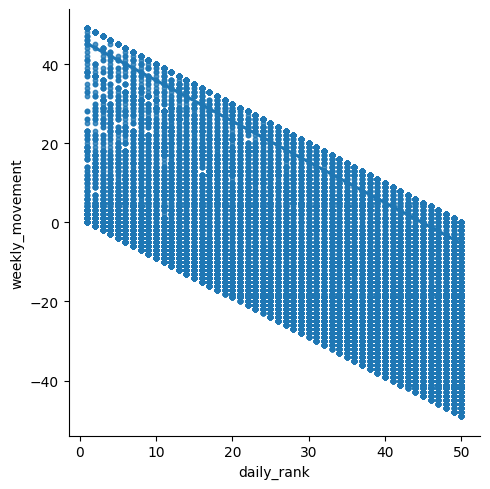

In [17]:
# Create a scatterplot for the "daily_rank" and "weekly_movement" columns in seaborn

sns.lmplot(x = 'daily_rank', y = 'weekly_movement', data = df_eva,scatter_kws={"s": 10})

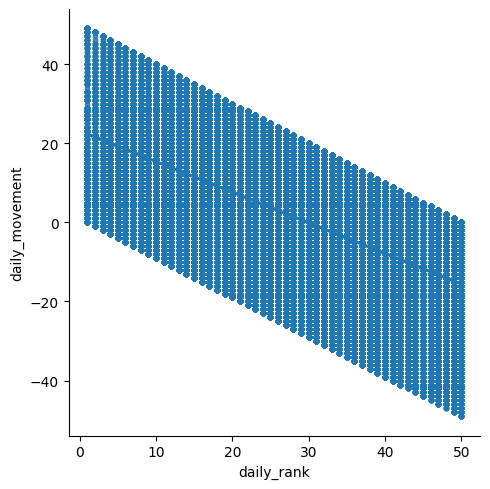

In [18]:
# Create a scatterplot for the "daily_rank" and "daily_movement" columns in seaborn

sns.lmplot(x = 'daily_rank', y = 'daily_movement', data = df_eva,scatter_kws={"s": 10})

The scatterplots confirm a strong relationship between the variables. This might suggest either a weekly pattern or a pattern of user behavior and engagement with specific videos gaining quick popularity. One important thing to keep in mind that explains the very geometric pattern of the scatterplots and potentially their relationship is that the nature of the ranking by nature limits the possibilities of options on the 'daily_movements' and 'weekly_movements' variables, since a video on the first place of the ranking would not possibly have negative values of daily_movement, for example, since there would not be the possibility that the previous ranking would have been higher. Nonetheless, it would be interesting to explore them further.

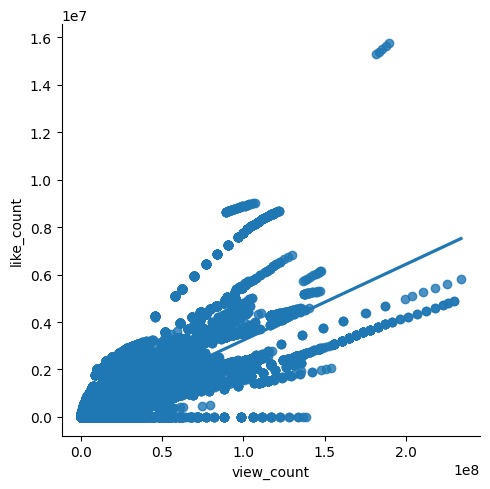

In [19]:
# Create a scatterplot for the "view_count" and "like_count" columns in seaborn

sns.lmplot(x = 'view_count', y = 'like_count', data = df_eva)

The scatterplot shows that the relationship between number of views and number of likes seems relatively linear for smaller values, with the number of views growing slightly faster than the number of likes. However, there seem to be some outliers on particularly popular videos that achieve a larger number of likes than the plot would otherwise predict. 

#05 Create a pair plot of the entire data set

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

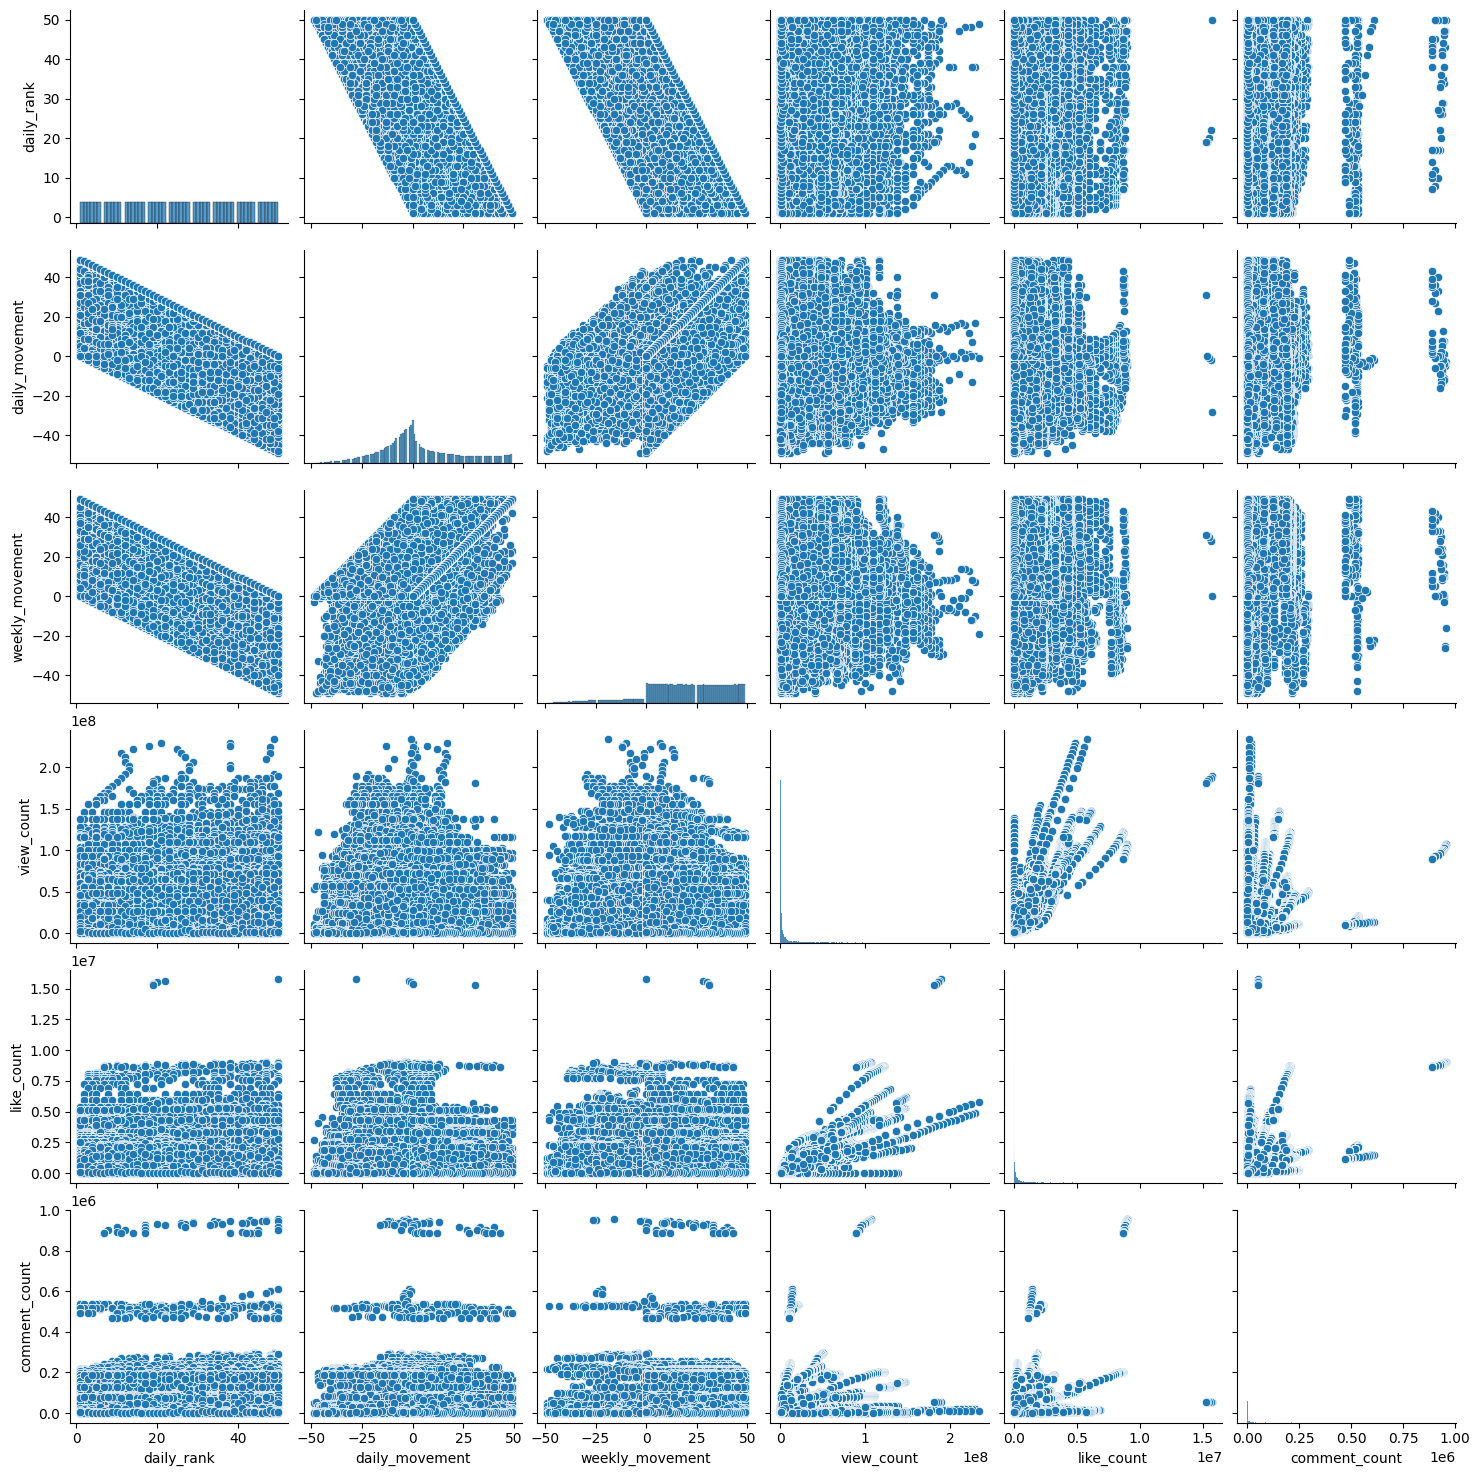

In [20]:
#create a pair plot
sns.pairplot(df)

For some variables, especially 'comment_count' there seem to be visible 'jumps' in the scatterplots that could be interesting to look deeper into. It seems that while the number of comments is not closely related to other variables it could be used to split videos into three categories depending on the number of comments, which could give us better insights. The non-linear relationship between 'view_count' and 'daily_rank', considering we know that the number of views is the main factor that influences the placement on each country's ranking, suggests there are differences between each country.

In [21]:
#check statistical info for df
df.describe()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count
count,197757.000000,197757.000000,197757.000000,1.977570e+05,1.977570e+05,197757.000000
mean,25.500771,3.369292,19.905141,8.681297e+06,3.066996e+05,8041.094834
std,14.431243,19.823211,19.247727,1.851627e+07,7.169108e+05,32774.369653
min,1.000000,-49.000000,-49.000000,0.000000e+00,0.000000e+00,0.000000
25%,13.000000,-9.000000,7.000000,3.580290e+05,1.132800e+04,390.000000
50%,26.000000,-1.000000,21.000000,1.269470e+06,4.472300e+04,1193.000000
75%,38.000000,15.000000,35.000000,6.643707e+06,2.468800e+05,3855.000000
max,50.000000,49.000000,49.000000,2.335466e+08,1.576806e+07,954336.000000


C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='view_count', ylabel='Count'>

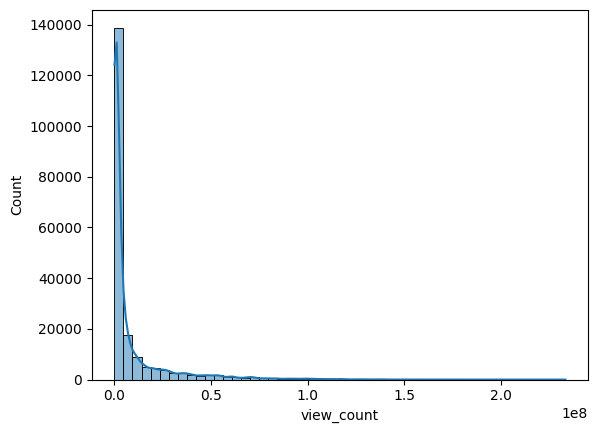

In [22]:
#create histogram of view_count for zoomed in view
sns.histplot(df['view_count'],bins=50,kde=True)


The distribution suggests that most videos scoring among the top 50 have less than 50 million views, with a smaller number of videos having more than 200 million views.

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='like_count', ylabel='Count'>

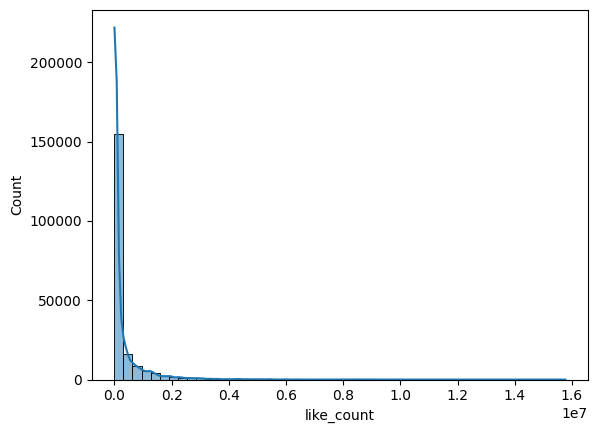

In [23]:
#create histogram of like_count for zoomed in view
sns.histplot(df['like_count'],bins=50,kde=True)

Similarly for number of likes, most videos seem to have less than 2 million likes, but a smaller number have more than 15 million likes.

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weekly_movement', ylabel='Count'>

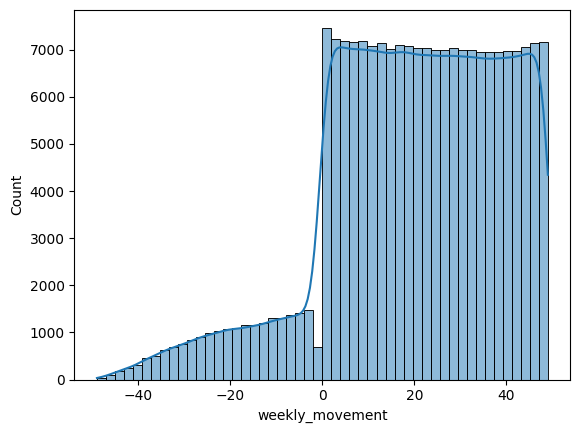

In [24]:
#create histogram of weekly_movement for zoomed in view
sns.histplot(df['weekly_movement'],bins=50,kde=True)

The histogram of the weekly movement suggests that the large majority of videos have moved up on the ranking since the previous week. Considering the dataset only includes videos on the top 50 of the rank, we need to consider the possibility that videos with a negative weekly movement might fall out of the top 50 completely, and therefore not be measurable within the collection parameters of the dataset.

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='daily_movement', ylabel='Count'>

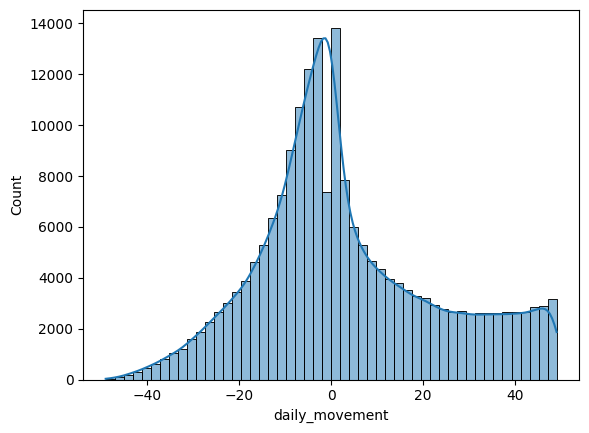

In [25]:
#create histogram of daily_movement for zoomed in view
sns.histplot(df['daily_movement'],bins=50,kde=True)

The variation on the ranking of videos seems to generally be close - but not equal to - zero, suggesting that there is a degree of volatily on a daily basis but most videos will remain in places closer to the previous day. However, we can see a slightly growth towards the higher values of the histogram, which might indicate that some videos have a much faster rise in popularity. 

#06 Revisit questions generated in the previous task in case they have been answered

"What is the average length of time between the time a video is published and when it reaches
the peak of its popularity"?

While we cannot precisely answer this question yet, the relationship between daily ranking of a video and the daily and weekly movement on the ranking charts seem to suggest this to be a question worth exploring further, as we have already observed some patterns on the daily and weekly movement of video rankings that suggest some volatility and might indicate some patterns that can be observed.

"Do the answers to these questions differ depending on the country in which the video became
popular?"

Some of the visualizations seem to already point towards a difference, even though we have not specifically looked into the country variable yet.

#08 Define any hypothesis you can at this point

H0: Videos reaching the 5 top places of the ranking have the same or smaller number of weekly movement on the ranking charts as videos placed 6 to 50 on the rank.

H1: Videos reaching the 5 top places of the ranking are more likely to have a weekly movement equal to or larger than 10 ranking steps compared to videos from place 6 to 50 of the rank.

H0: Videos with a higher number of views than average have an equal or smaller number of likes as videos with a smaller or equal number of views than average.

H2: Videos with a higher number of views than average have a larger number of likes than videos with a smaller or equal number of views than average.

H0: Videos with a higher number of likes than average have an equal or smaller number of comments as videos with a smaller or equal number of likes than average.

H3: Videos with a higher number of likes than average have a larger number of comments than videos with a smaller or equal number of likes than average.

In [26]:
#check df shape
df.shape

(197757, 15)